In [69]:
import os
import time 
import torch 
import torchvision 
import torch.nn as nn
import torch.nn.functional as F
from torch import autograd, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

NUM_EPOCHS = 50 
BATCH_SIZE = 128
LEARNING_RATE = 1e-4

MODEL_PATH = './models'
MODEL_NAME = 'alexnet_cifar100_' + str(NUM_EPOCHS) + '.pth'

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# Create model
if not os.path.exists(MODEL_PATH):
    os.makedirs(MODEL_PATH)

In [39]:
# model
class AlexNet(nn.Module):
    
    def __init__(self, num_classes=100):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 2 * 2, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )
        
        
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 2 * 2)
        x = self.classifier(x)
        return x

In [48]:
# data loader
transform = transforms.Compose([
    transforms.RandomCrop(36, padding=4),
    transforms.CenterCrop(32),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

train_set = datasets.CIFAR100(
    root='./data',
    download=True,
    train=True,
    transform=transform
)

train_loader = DataLoader(
    dataset=train_set,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

test_set = datasets.CIFAR100(
    root='./data',
    download=False,
    train=False,
    transform=transform
)

test_loader = DataLoader(
    dataset=test_set,
    batch_size=BATCH_SIZE,
    shuffle=False,
)

Files already downloaded and verified


In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_loss(Loss_list, Accuracy_list):

    x1 = range(1, len(Loss_list)+1)
    x2 = range(1, len(Accuracy_list)+1)
    y1 = Accuracy_list
    y2 = Loss_list
    plt.subplot(2, 1, 1)
    plt.plot(x1, y1, 'o-')
    plt.title('Test accuracy vs. epoches')
    plt.ylabel('Test accuracy')
    plt.subplot(2, 1, 2)
    plt.plot(x2, y2, '.-')
    plt.xlabel('Test loss vs. epoches')
    plt.ylabel('Test loss')
    plt.show()
#     plt.savefig("accuracy_loss.jpg")


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=1024, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_features=

Epoch[42]: Accuary = 44.060%, Loss = 1.59788 time = 18.888s
Epoch[43/50] 100/391: loss = 1.43310
Epoch[43/50] 199/391: loss = 1.48687
Epoch[43/50] 298/391: loss = 1.46330
Epoch[43]: Accuary = 43.230%, Loss = 1.68704 time = 19.474s
Epoch[44/50] 100/391: loss = 1.41873
Epoch[44/50] 199/391: loss = 1.45485
Epoch[44/50] 298/391: loss = 1.45145
Epoch[44]: Accuary = 44.650%, Loss = 1.31638 time = 18.657s
Epoch[45/50] 100/391: loss = 1.40745
Epoch[45/50] 199/391: loss = 1.40706
Epoch[45/50] 298/391: loss = 1.42845
Epoch[45]: Accuary = 45.040%, Loss = 1.46253 time = 18.858s
Epoch[46/50] 100/391: loss = 1.37961
Epoch[46/50] 199/391: loss = 1.40601
Epoch[46/50] 298/391: loss = 1.40844
Epoch[46]: Accuary = 44.570%, Loss = 1.40903 time = 19.368s
Epoch[47/50] 100/391: loss = 1.35477
Epoch[47/50] 199/391: loss = 1.36273
Epoch[47/50] 298/391: loss = 1.37572
Epoch[47]: Accuary = 44.960%, Loss = 1.42250 time = 19.065s
Epoch[48/50] 100/391: loss = 1.33057
Epoch[48/50] 199/391: loss = 1.35968
Epoch[48/50

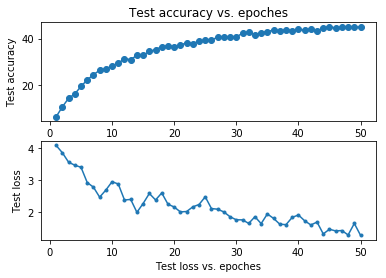

Model save to ./models/alexnet_cifar100_50.pth.


/home/yaliu/Dev/anaconda3/envs/py37/lib/python3.7/site-packages/torch/serialization.py:251: UserWarning: Couldn't retrieve source code for container of type AlexNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [70]:
# train 
model = AlexNet().to(DEVICE)
print(model)
critrion = nn.CrossEntropyLoss().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-8)

# 定义两个绘图用的数组
Loss_list = []
Accuracy_list = []

for epoch in range(1, NUM_EPOCHS + 1):
    model.train()

    start_time = time.time()
    
    loss = None
    sum_loss = 0.0
    for idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        
        # forward
        outputs = model(images)
        loss = critrion(outputs, labels)
        
        # backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        sum_loss += loss.item()
        if idx % 99 == 0 and idx > 0:
            print('Epoch[{}/{}] {}/{}: loss = {:.5f}'.format(epoch, NUM_EPOCHS, idx+1, len(train_loader), sum_loss / 100))
            sum_loss = 0.0

    end_time = time.time()

    # test
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        # prediction
        outputs = model(images)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    print('Epoch[{}]: Accuary = {:.3f}%, Loss = {:.5f} time = {:.3f}s'.format(epoch, correct * 100.0 / total, loss.item(), end_time-start_time))
    Loss_list.append(loss.item())
    Accuracy_list.append(correct * 100.0 / total)

# plot
plot_loss(Loss_list, Accuracy_list)

# Save the model checkpoint
torch.save(model, MODEL_PATH + '/' + MODEL_NAME)
print(f"Model save to {MODEL_PATH + '/' + MODEL_NAME}.")